# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# Sanity Check of Data

In [4]:
df.shape

(4653, 9)

In [5]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
df.describe(include="object")

,Education,City,Gender,EverBenched
count,4653,4653,4653,4653
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3601,2228,2778,4175


In [9]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1889)

In [11]:
df = df.drop_duplicates()

# Exploratory Data Analysis (EDA)

In [12]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<Axes: xlabel='Age', ylabel='Count'>

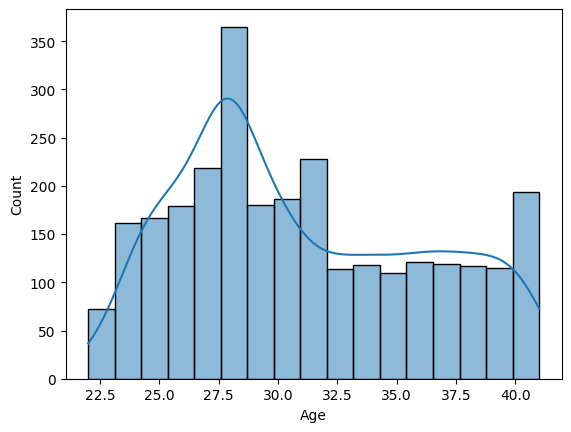

In [13]:
sns.histplot(data=df, x="Age", kde=True)

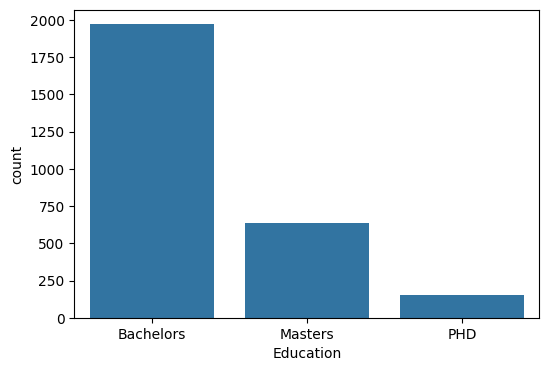

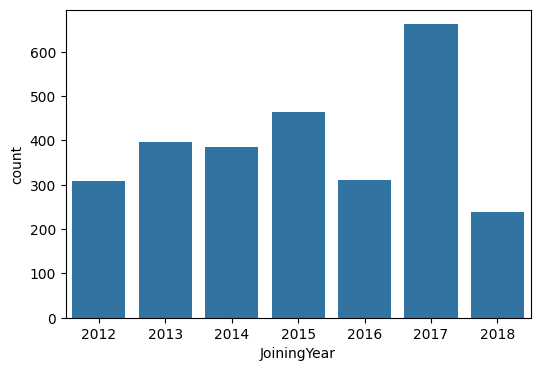

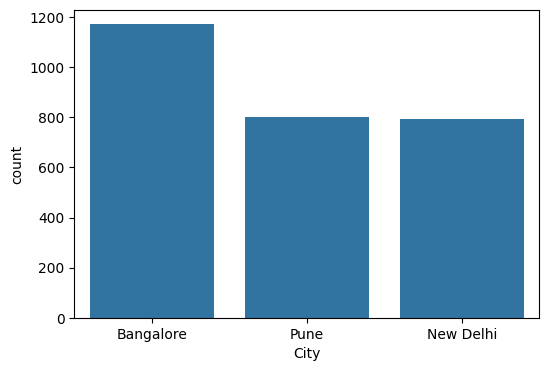

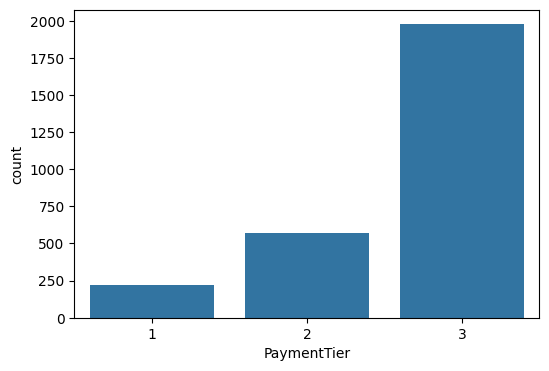

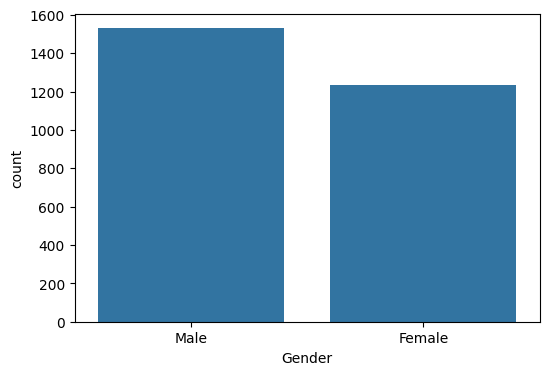

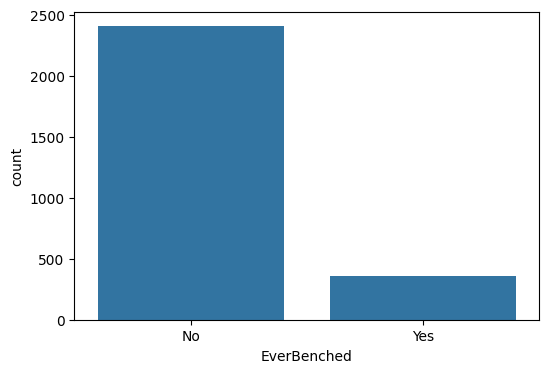

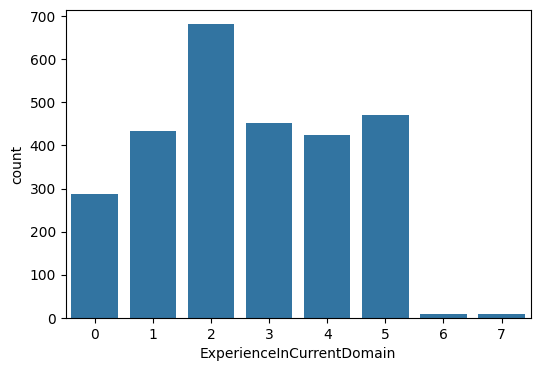

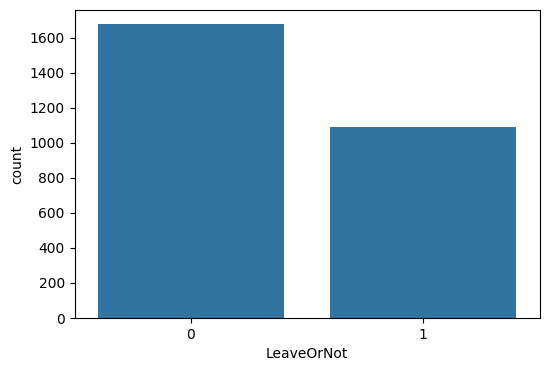

In [14]:
categorical_cols = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)

In [15]:
df["LeaveOrNot"].value_counts()

LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64

<Axes: >

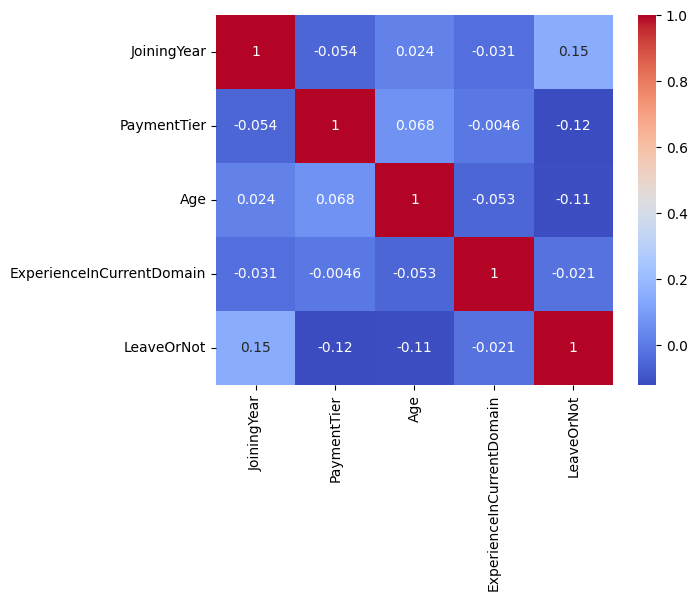

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")

# Feature Engineering

In [17]:
df["EverBenched"] = df["EverBenched"].map({
    "No" : 0,
    "Yes" : 1,
})

df = df.rename(columns={
    "Gender" : "isFemale"
})

df["isFemale"] = df["isFemale"].map({
    "Male" : 0,
    "Female" : 1,
})

In [18]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,isFemale,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,0,0,0,0
1,Bachelors,2013,Pune,1,28,1,0,3,1
2,Bachelors,2014,New Delhi,3,38,1,0,2,0
3,Masters,2016,Bangalore,3,27,0,0,5,1
4,Masters,2017,Pune,3,24,0,1,2,1


In [19]:
df = pd.get_dummies(df,drop_first=True)

In [20]:
df.head()

,JoiningYear,PaymentTier,Age,isFemale,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,2017,3,34,0,0,0,0,False,False,False,False
1,2013,1,28,1,0,3,1,False,False,False,True
2,2014,3,38,1,0,2,0,False,False,True,False
3,2016,3,27,0,0,5,1,True,False,False,False
4,2017,3,24,0,1,2,1,True,False,False,True


In [21]:
df = df.astype(int)

In [22]:
df.head()

,JoiningYear,PaymentTier,Age,isFemale,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,2017,3,34,0,0,0,0,0,0,0,0
1,2013,1,28,1,0,3,1,0,0,0,1
2,2014,3,38,1,0,2,0,0,0,1,0
3,2016,3,27,0,0,5,1,1,0,0,0
4,2017,3,24,0,1,2,1,1,0,0,1


# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop("LeaveOrNot",axis=1)
y = df["LeaveOrNot"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling Imbalanced Target (SMOTE)

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)


# Model Training

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score

In [27]:
models = {
    "Logistic Regression" : LogisticRegression(class_weight="balanced"),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(class_weight="balanced"),
    "SVM" : SVC(class_weight="balanced",probability=True),
    "Random Forest" : RandomForestClassifier(),
    "XG Boost" : XGBClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
}

In [28]:
results = []

for name, model in models.items():
    # Fit model on SMOTE-resampled training data
    model.fit(X_res, y_res)

    # Test predictions
    y_test_pred = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Train predictions on resampled data
    y_train_pred = model.predict(X_res)
    train_acc = accuracy_score(y_res, y_train_pred)
    train_f1 = f1_score(y_res, y_train_pred)

    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "Train F1": round(train_f1, 4),
        "Test F1": round(test_f1, 4)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)   


                 Model  Train Accuracy  Test Accuracy  Train F1  Test F1
0  Logistic Regression          0.6497         0.6495    0.6412   0.5939
1                  KNN          0.8363         0.7130    0.8383   0.6516
2          Naive Bayes          0.6418         0.6276    0.6672   0.6154
3        Decision Tree          0.9605         0.6835    0.9589   0.6003
4                  SVM          0.8047         0.7755    0.7935   0.7125
5        Random Forest          0.9605         0.7284    0.9602   0.6467
6             XG Boost          0.9258         0.7437    0.9234   0.6507
7            Ada Boost          0.7744         0.7448    0.7548   0.6517


# Model Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, classification_report

# --- XGBoost pipeline & tuning ---
xgb_pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 4],
    'xgb__learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    xgb_pipe, param_grid=xgb_params, scoring=make_scorer(f1_score),
    cv=3, n_jobs=-1, verbose=1
)

xgb_grid.fit(X_train, y_train)
print("XGBoost Best Params:", xgb_grid.best_params_)
print(classification_report(y_test, xgb_grid.predict(X_test)))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
XGBoost Best Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       537
           1       0.79      0.65      0.71       376

    accuracy                           0.78       913
   macro avg       0.78      0.76      0.77       913
weighted avg       0.78      0.78      0.78       913



In [30]:
# --- AdaBoost pipeline & tuning ---
ada_pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), random_state=42))
])

ada_params = {
    'ada__n_estimators': [50, 100],
    'ada__learning_rate': [0.05, 0.1]
}

ada_grid = GridSearchCV(
    ada_pipe, param_grid=ada_params, scoring=make_scorer(f1_score),
    cv=3, n_jobs=-1, verbose=1
)

ada_grid.fit(X_train, y_train)
print("AdaBoost Best Params:", ada_grid.best_params_)
print(classification_report(y_test, ada_grid.predict(X_test)))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoost Best Params: {'ada__learning_rate': 0.1, 'ada__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       537
           1       0.68      0.58      0.63       376

    accuracy                           0.72       913
   macro avg       0.71      0.70      0.70       913
weighted avg       0.71      0.72      0.71       913



In [31]:
# --- SVM tuning ---
svm_pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='rbf', class_weight='balanced', random_state=42))
])

svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid={
        'svm__C': [0.5, 1, 2, 5],
        'svm__gamma': ['scale', 0.1, 0.01]
    },
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train, y_train)
print("SVM Best Params:", svm_grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM Best Params: {'svm__C': 5, 'svm__gamma': 0.1}


# Final Model

In [32]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


best_params = {
    "learning_rate": 0.1,
    "max_depth": 4,
    "n_estimators": 100,
    "random_state": 42,
    "use_label_encoder": False,
    "eval_metric": "logloss"
}

# Train final model
xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7962760131434831

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       537
           1       0.88      0.58      0.70       376

    accuracy                           0.80       913
   macro avg       0.82      0.76      0.77       913
weighted avg       0.81      0.80      0.79       913


Confusion Matrix:
 [[508  29]
 [157 219]]


# Saving the Model

In [33]:
import joblib

joblib.dump(xgb_clf, 'models/xgboost_model.pkl')


joblib.dump(scaler, 'models/scaler.pkl')

import joblib
joblib.dump(list(X_train.columns), "models/feature_columns.pkl")



['models/feature_columns.pkl']